In [1]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   # plotting
import seaborn as sns   # plotting heatmap
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

In [2]:
# lstm model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from matplotlib import pyplot
import keras
from tensorflow.keras.layers import GRU
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization

In [3]:
Final = pd.read_csv("Concatnated.csv")

In [4]:
Final = np.array(Final[:292000])
print(Final.shape)

(292000, 447)


In [5]:
Final = Final.reshape(-1,1000,Final.shape[1])
shuffle_idx = np.random.permutation(Final.shape[0])
Final = Final[shuffle_idx]

In [6]:
print('Old:', Final.shape)
Final = Final.reshape(292000, 447)
print('Updated:',Final.shape)

Old: (292, 1000, 447)
Updated: (292000, 447)


In [7]:
X = Final[:, :446]
y = Final[:,446]

In [8]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(292000, 446)

In [9]:
pd.value_counts(y)

0.0    146493
2.0     48831
1.0     48831
3.0     47845
dtype: int64

In [10]:
X_trainX = []
y_trainX = []
strat_time = 0
timestamp = 10
length = len(Final)

for i in range(length):
    X_trainX.append(X[strat_time:timestamp, :446])
    y_trainX.append(y[timestamp])
    
    if timestamp >= 291999:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_trainX))
print(len(y_trainX))

291990
291990


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_trainX, y_trainX, test_size=0.05, random_state=0)

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
X_train.shape

(277390, 10, 446)

In [14]:
pd.value_counts(y_train)

0.0    139176
2.0     46391
1.0     46378
3.0     45445
dtype: int64

In [15]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [16]:
print(y_train[0])
print(y_test[64])
print(y_train[2345])
print(y_test[97])

[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]


In [17]:
X_test.shape

(14600, 10, 446)

In [18]:
print(X_train[0])
print('\n')
print(y_train[0])

[[2.33733369e-02 1.60877946e-02 4.68051474e-03 ... 1.94777327e-05
  3.40242444e-07 2.46123262e-06]
 [2.34353781e-02 1.60869099e-02 4.70441919e-03 ... 1.94902770e-05
  3.42002640e-07 2.46110782e-06]
 [2.34984877e-02 1.60861649e-02 4.72842949e-03 ... 1.95036825e-05
  3.43767607e-07 2.46105432e-06]
 ...
 [2.38297591e-02 1.60845339e-02 4.84989883e-03 ... 1.95835824e-05
  3.52660398e-07 2.46185931e-06]
 [2.38990965e-02 1.60846256e-02 4.87444225e-03 ... 1.96021276e-05
  3.54451825e-07 2.46223531e-06]
 [2.39694408e-02 1.60848561e-02 4.89905751e-03 ... 1.96215248e-05
  3.56247300e-07 2.46268309e-06]]


[0. 1. 0. 0.]


In [19]:
#Model Generation
model = Sequential()

model.add(LSTM(units = 120, activation='tanh', return_sequences = True, input_shape = (10, 446)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.add(Dense(units = 4, activation='softmax'))
model.compile(optimizer = optimizer, loss = 'CategoricalCrossentropy', metrics=['accuracy'])

In [20]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="1RNN.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [21]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/5
2168/2168 [==============================] - 46s 19ms/step - loss: 0.0608 - accuracy: 0.9854 - val_loss: 0.0332 - val_accuracy: 0.9948
Epoch 2/5
2168/2168 [==============================] - 40s 19ms/step - loss: 0.0216 - accuracy: 0.9965 - val_loss: 0.0127 - val_accuracy: 0.9979
Epoch 3/5
2168/2168 [==============================] - 40s 19ms/step - loss: 0.0159 - accuracy: 0.9973 - val_loss: 0.0656 - val_accuracy: 0.9912
Epoch 4/5
2168/2168 [==============================] - 40s 18ms/step - loss: 0.0131 - accuracy: 0.9980 - val_loss: 0.0087 - val_accuracy: 0.9988
Epoch 5/5
2168/2168 [==============================] - 41s 19ms/step - loss: 0.0111 - accuracy: 0.9983 - val_loss: 0.0091 - val_accuracy: 0.9990


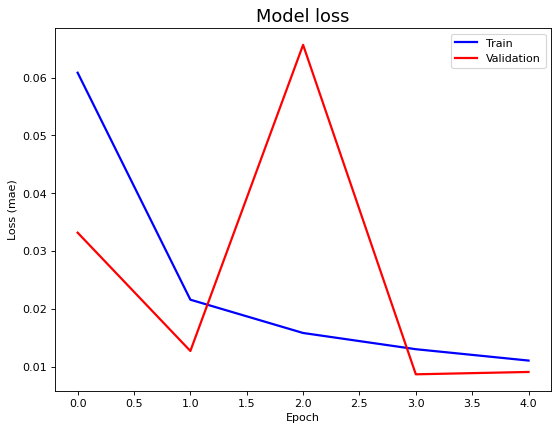

In [22]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [23]:
#Prediction
pred = model.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[7305    0    0    2]
 [   1 2450    0    2]
 [   0    1 2439    0]
 [   8    1    0 2391]]


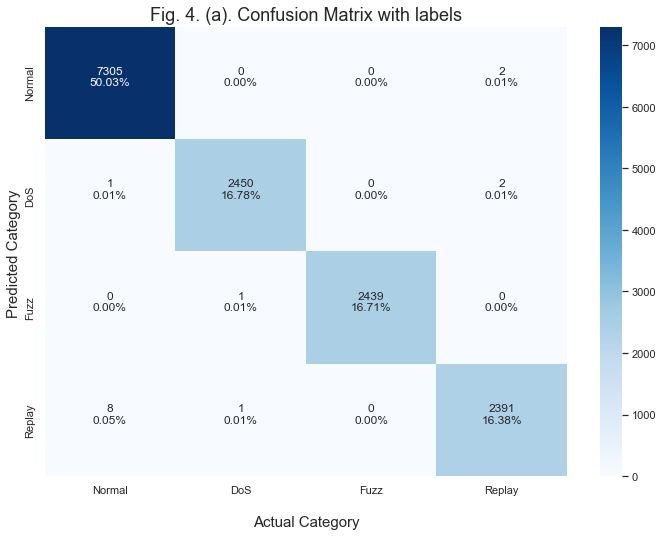

In [25]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Fig. 4. (a). Confusion Matrix with labels', fontsize=18);
ax.set_xlabel('\nActual Category', fontsize=15)
ax.set_ylabel('Predicted Category ', fontsize=15);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"])
ax.yaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [26]:
from sklearn.metrics import classification_report
class_names = ["Normal", "DoS", "Fuzz", "Replay"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      7307
         DoS       1.00      1.00      1.00      2453
        Fuzz       1.00      1.00      1.00      2440
      Replay       1.00      1.00      1.00      2400

    accuracy                           1.00     14600
   macro avg       1.00      1.00      1.00     14600
weighted avg       1.00      1.00      1.00     14600



ROC AUC score: 0.999077110365161


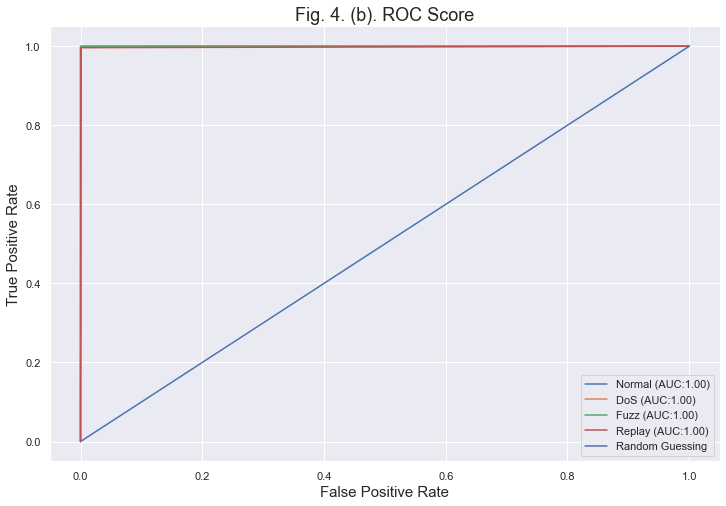

In [27]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["Normal", "DoS", "Fuzz", "Replay"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_title('Fig. 4. (b). ROC Score', fontsize=18);
c_ax.set_xlabel('False Positive Rate', fontsize=15)
c_ax.set_ylabel('True Positive Rate', fontsize=15)
plt.show()